# Notebook 07: Métricas Espaciales Avanzadas

**Objetivo:** Calcular la distancia promedio desde las comunas a los servicios más cercanos, cumpliendo con la pauta de la Sesión Práctica 1.

In [1]:
%run ./00_template.py

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# Agregar el path de app para importar el backend
sys.path.append(os.path.abspath('../app'))
from calculator_backend import cargar_servicios_unificados, calcular_distancia_minima_por_categoria

print(" Iniciando Cálculo de Distancias Físicas")

===  Template PEP1 Configurado Exitosamente ===
 Base Dir       : /home/jovyan
 GeoDatabase    :  Encontrada
 Censo CSV      :  Encontrado


2026-01-19 01:54:40.745 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


 Iniciando Cálculo de Distancias Físicas


In [2]:
# 1. Cargar Datos
comunas = gpd.read_file(RUTA_GPKG, layer="comunas_rm_censo")
servicios = cargar_servicios_unificados(RUTA_GPKG)

print(f"📍 Comunas: {len(comunas)}")
print(f" Servicios: {len(servicios)}")

2026-01-19 01:54:43.822 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-01-19 01:54:43.824 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


📍 Comunas: 52
 Servicios: 35667


In [5]:
# 2. Preparar puntos de origen (Centroides de comunas)
# Nota: Para resultados más precisos se podrían usar centroides de manzanas,
# pero para este análisis usaremos el centroide de la comuna.
origenes = comunas.copy()
origenes["geometry"] = origenes.centroid

print(" Calculando distancias al servicio más cercano por categoría...")
distancias_df = calcular_distancia_minima_por_categoria(origenes, servicios)

print(" Cálculo finalizado.")

 Calculando distancias al servicio más cercano por categoría...
 Cálculo finalizado.


In [6]:
# 3. Procesar y Guardar
# Convertir distancias a KM para mejor lectura
cols_dist = [c for c in distancias_df.columns if c.startswith("dist_min_")]
for col in cols_dist:
    distancias_df[col] = distancias_df[col] / 1000.0

# Guardar resultado
path_output = OUTPUTS_DIR / "distancias_minimas_servicios.csv"
distancias_df.drop(columns='geometry').to_csv(path_output, index=False)

print(f" Resultados guardados en: {path_output}")

 Resultados guardados en: /home/jovyan/outputs/distancias_minimas_servicios.csv


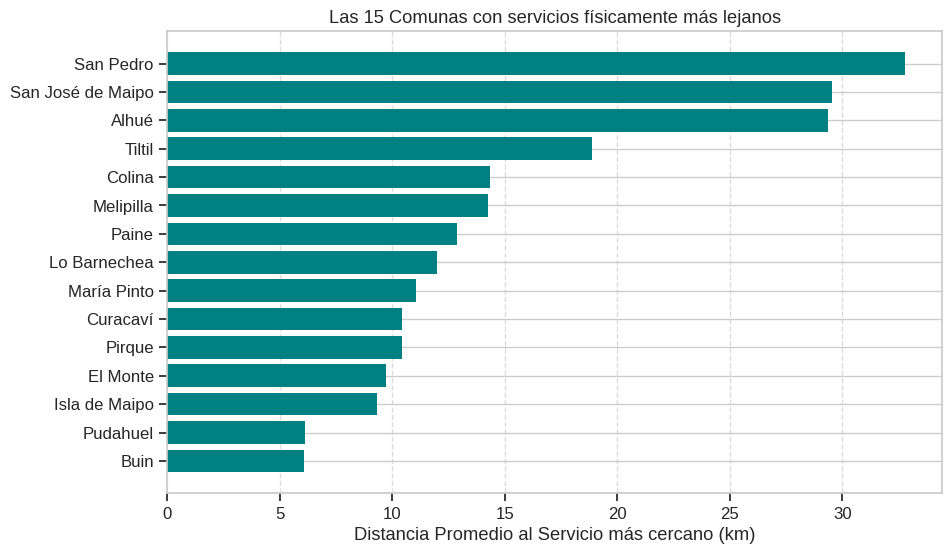

In [6]:
# 4. Visualización: Ranking de Inaccesibilidad Física
# Calculamos una distancia promedio simple entre todos los servicios evaluados
distancias_df["distancia_promedio_total"] = distancias_df[cols_dist].mean(axis=1)

top_distancias = distancias_df.sort_values("distancia_promedio_total", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_distancias["COMUNA"], top_distancias["distancia_promedio_total"], color='teal')
plt.xlabel("Distancia Promedio al Servicio más cercano (km)")
plt.title("Las 15 Comunas con servicios físicamente más lejanos")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()